# Seminární práce

In [1]:
import pandas as pd

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

## Zadání
Vyberte libovolnou báseň, která má minimálně 3 sloky a 4 verše. Úkolem je zjistit četnost slov stejného počtu písmen a udělat nad tímto souborem dat jednoduchou statistickou analýzu se všemi výpočty a vysvětlením.

* Práce bude obsahovat:
    * tabulku s četností a rel. četností
    * aritmetický průměr
    * modus
    * medián
    * rozptyl směrodatné odchylky
    * variační koeficient 
    * kruhový a jeden jiný diagram

## The Obligation to Be Happy

$$It is more onerous  
than the rites of beauty  
or housework, harder than love.  
But you expect it of me casually,  
the way you expect the sun  
to come up, not in spite of rain  
or clouds but because of them. $$

And so I smile, as if my own fidelity  
to sadness were a hidden vice—  
that downward tug on my mouth,  
my old suspicion that health  
and love are brief irrelevancies,  
no more than laughter in the warm dark  
strangled at dawn.

Happiness. I try to hoist it  
on my narrow shoulders again—  
a knapsack heavy with gold coins.  
I stumble around the house,    
bump into things.  
Only Midas himself  
would understand.

## Soubor dat formou tabulky

In [2]:
import pandas as pd
from collections import Counter
from math import sqrt
pd.options.display.float_format = '{:,.3f}'.format
translation_table = dict.fromkeys(map(ord, '.,”“’;'), None)
f = open('poem', 'r')
words = []
for line in f:
    line = line.translate(translation_table)
    words = words + [len(word) for word in line.split()]
counter = Counter(words)
ser = pd.Series(words)
mean = ser.mean()
med = ser.median()
mod = ser.mode()
variance = ser.var()
std = sqrt(variance)
varcf = std / mean * 100
dfws = pd.DataFrame.from_dict(counter, orient='index',).sort_index()
dfws.rename_axis({0:'Četnost'}, axis='columns', inplace=True)
dfws["Relativní četnost"] = dfws["Četnost"] / sum(dfws["Četnost"])
dfws.rename_axis('Počet písmen ve slově',axis="columns", inplace=True)




Počet písmen ve slově,Četnost,Relativní četnost
1,5,0.044
2,28,0.248
3,19,0.168
4,21,0.186
5,12,0.106
6,11,0.097
7,5,0.044
8,5,0.044
9,5,0.044
10,1,0.009


# Informace o počtu písmen

In [3]:
from IPython.display import Latex
info = pd.DataFrame.from_dict({
    "Median":med,
    "Modus":mod[0],
    "Průměr":mean,
    "Rozptyl":variance,
    "Směrodatná odchylka":std,
    "Variační koeficient": varcf}, orient="index")
info.rename_axis({0:'Hodnota'}, axis='columns', inplace=True)
info

,Hodnota
Median,4.000
Modus,2.000
Průměr,4.168
Rozptyl,5.320
Směrodatná odchylka,2.306
Variační koeficient,55.335


## Výpočty hodnot

### Medián

**Medián** je prostřední hodnota v souboru. Pokud je počet hodnot v souboru sudý je medián průměrem 2 prostředních hodnot.

$$ med(x) = 4 $$

### Modus

**Modus** je hodnota s největší četností

$$ mod(x) = 2 $$

### Průměr

$$ {\bar{x}} = \frac{\sum_{i=1}^{n}}{n} $$
$$ {\bar{x}} = \frac{1*5 + 2*28 + 3*19..}{113} = \frac{471}{113} = 4,168141593 $$

### Rozptyl

$$ Var(x) = \frac{5*(1−\bar{x})^2 + 28*(2−\bar{x})^2+19*(3 − \bar{x})^2 +21*(4−\bar{x})^2+...}{113} = 5,320 $$

### Směrodatná odchylka

$$ \sigma = \sqrt{Var(x)} = \sqrt{5,320} = 2,206 $$

### Variační koeficient

$$ v = \frac{\sigma}{\bar{x}} * 100\% = \frac{2,206}{4,168} * 100\% = 55,335 \% $$

# Grafické znázornění souboru pomocí koláčového grafu

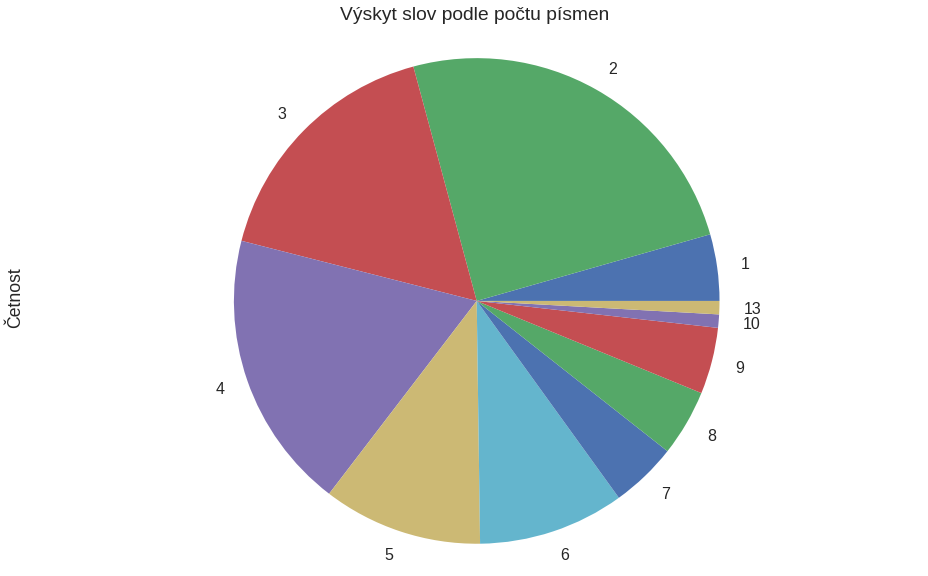

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
sns.set(font_scale=1.6)
rcParams['figure.figsize'] = 16,10
pie = dfws.plot.pie(y=0)
plt.axis('equal')

plt.legend().set_visible(False)
plt.title('Výskyt slov podle počtu písmen')
plt.show()

## Výpočet úhlů pro koláčový graf

$$ x_1 = \frac{5}{113}*360 = 15,92920354 ^{\circ} \dot{=} 15 ^{\circ} 55'$$

$$ x_2 = \frac{28}{113}*360 = 89,203539823 ^{\circ} \dot{=} 89 ^{\circ} 12' $$

$$ x_3 = \frac{19}{113}*360 = 60,530973451 ^{\circ} \dot{=} 60 ^{\circ} 31' $$

$$ x_4 = \frac{21}{113}*360 = 66,902654867 ^{\circ} \dot{=} 66 ^{\circ} 54' $$

$$ x_5 = \frac{12}{113}*360 = 38,230088496 ^{\circ} \dot{=} 38 ^{\circ} 13' $$

$$ x_6 = \frac{11}{113}*360 = 38,230088496 ^{\circ} \dot{=} 35 ^{\circ} 02' $$

$$ x_7 = \frac{5}{113}*360 = 15,92920354 ^{\circ} \dot{=} 15 ^{\circ} 55'$$

$$ x_8 = \frac{5}{113}*360 = 15,92920354 ^{\circ} \dot{=} 15 ^{\circ} 55'$$

$$ x_9 = \frac{5}{113}*360 = 15,92920354 ^{\circ} \dot{=} 15 ^{\circ} 55'$$

$$ x_{10} = \frac{1}{113}*360 = 3,185840708 ^{\circ} \dot{=} 3 ^{\circ} 11'$$

$$ x_{11} = \frac{1}{113}*360 = 3,185840708 ^{\circ} \dot{=} 3 ^{\circ} 11'$$


# Grafické znázornění souboru pomocí sloupcového grafu

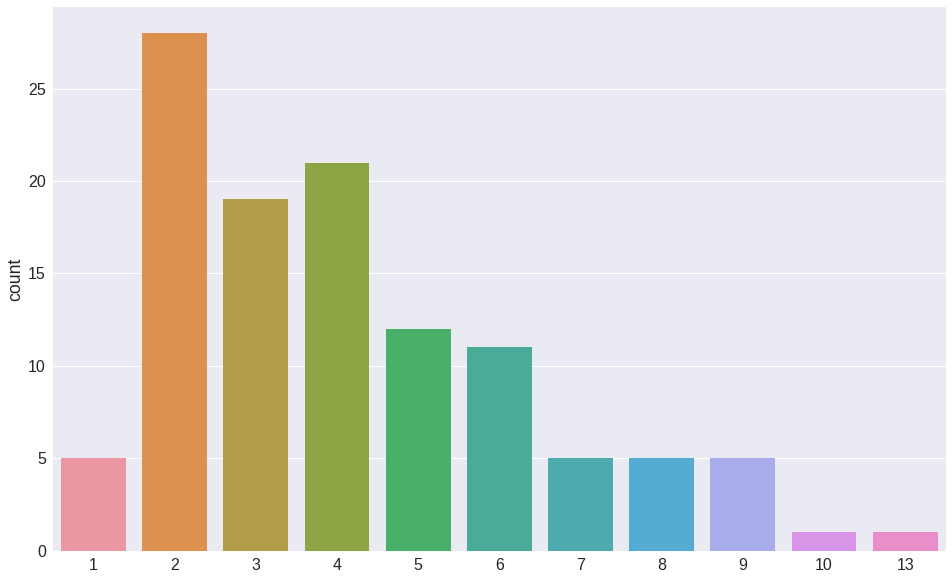

In [5]:
sns.set(style="darkgrid")
sns.plt.figure(figsize=(16,10))
sns.set(font_scale=1.6)
sns.countplot(x=ser.keys(),data=ser)
sns.plt.show()

# Závěr

Práce mi umožnila přiblížit se k zajímavému světu statistiky. Jakožto žák oboru informačních technologií jsem se mimo jiné naučil statistické problémy řešit na počítači. Toto je výstup mého snažení. Seminární práce mě čekají i na vysoké škole, kde tuto zkušenost ze střední určitě ocením.